<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/ml_python.png' width=600/></center>

<center><img src = "https://raw.githubusercontent.com/Jangrae/img/master/air.png" width=800/></center>

# 실습 내용

- 머신러닝 모델링을 위한 코딩은 무조건 할 수 있어야 합니다.
- 코딩 내용을 자세히 알지 못해도 **무작정** 코딩을 진행해봅니다.
- AirQuality 데이터를 대상으로 모델링 해서 오존 농도를 예측해 봅니다.
- LinearRegression 알고리즘을 사용합니다.

# 1.환경 준비

- 기본 **라이브러리**와 대상 **데이터**를 가져와 이후 과정을 준비합니다.

<img src = "https://raw.githubusercontent.com/Jangrae/img/master/code_11.png" width=700 align="left"/>

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format = 'retina'

In [2]:
# sklearn 버전 확인
import sklearn
print(sklearn.__version__)

1.6.1


In [3]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/airquality_simple.csv'
data = pd.read_csv(path)

# 2.데이터 이해

- 분석할 데이터를 **충분히 이해**할 수 있도록 다양한 **탐색** 과정을 수행합니다.

<img src = "https://raw.githubusercontent.com/Jangrae/img/master/code_12.png" width=700 align="left"/>

In [4]:
# 상위 몇 개 행 확인
data.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41,190.0,7.4,67,5,1
1,36,118.0,8.0,72,5,2
2,12,149.0,12.6,74,5,3
3,18,313.0,11.5,62,5,4
4,19,NaN,14.3,56,5,5


In [5]:
# 하위 몇 개 행 확인
data.tail()

,Ozone,Solar.R,Wind,Temp,Month,Day
148,30,193.0,6.9,70,9,26
149,23,145.0,13.2,77,9,27
150,14,191.0,14.3,75,9,28
151,18,131.0,8.0,76,9,29
152,20,223.0,11.5,68,9,30


In [6]:
# 변수 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    153 non-null    int64  
 1   Solar.R  146 non-null    float64
 2   Wind     153 non-null    float64
 3   Temp     153 non-null    int64  
 4   Month    153 non-null    int64  
 5   Day      153 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 7.3 KB


In [7]:
# 기술통계 확인
data.describe()

,Ozone,Solar.R,Wind,Temp,Month,Day
count,153.000000,146.000000,153.000000,153.000000,153.000000,153.000000
mean,42.052288,185.931507,9.957516,77.882353,6.993464,15.803922
std,30.156127,90.058422,3.523001,9.465270,1.416522,8.864520
min,1.000000,7.000000,1.700000,56.000000,5.000000,1.000000
25%,20.000000,115.750000,7.400000,72.000000,6.000000,8.000000
50%,34.000000,205.000000,9.700000,79.000000,7.000000,16.000000
75%,59.000000,258.750000,11.500000,85.000000,8.000000,23.000000
max,168.000000,334.000000,20.700000,97.000000,9.000000,31.000000


In [8]:
# 상관관계 확인
data.corr(numeric_only=True)

,Ozone,Solar.R,Wind,Temp,Month,Day
Ozone,1.000000,0.280068,-0.605478,0.683372,0.174197,0.004419
Solar.R,0.280068,1.000000,-0.056792,0.275840,-0.075301,-0.150275
Wind,-0.605478,-0.056792,1.000000,-0.457988,-0.178293,0.027181
Temp,0.683372,0.275840,-0.457988,1.000000,0.420947,-0.130593
Month,0.174197,-0.075301,-0.178293,0.420947,1.000000,-0.007962
Day,0.004419,-0.150275,0.027181,-0.130593,-0.007962,1.000000


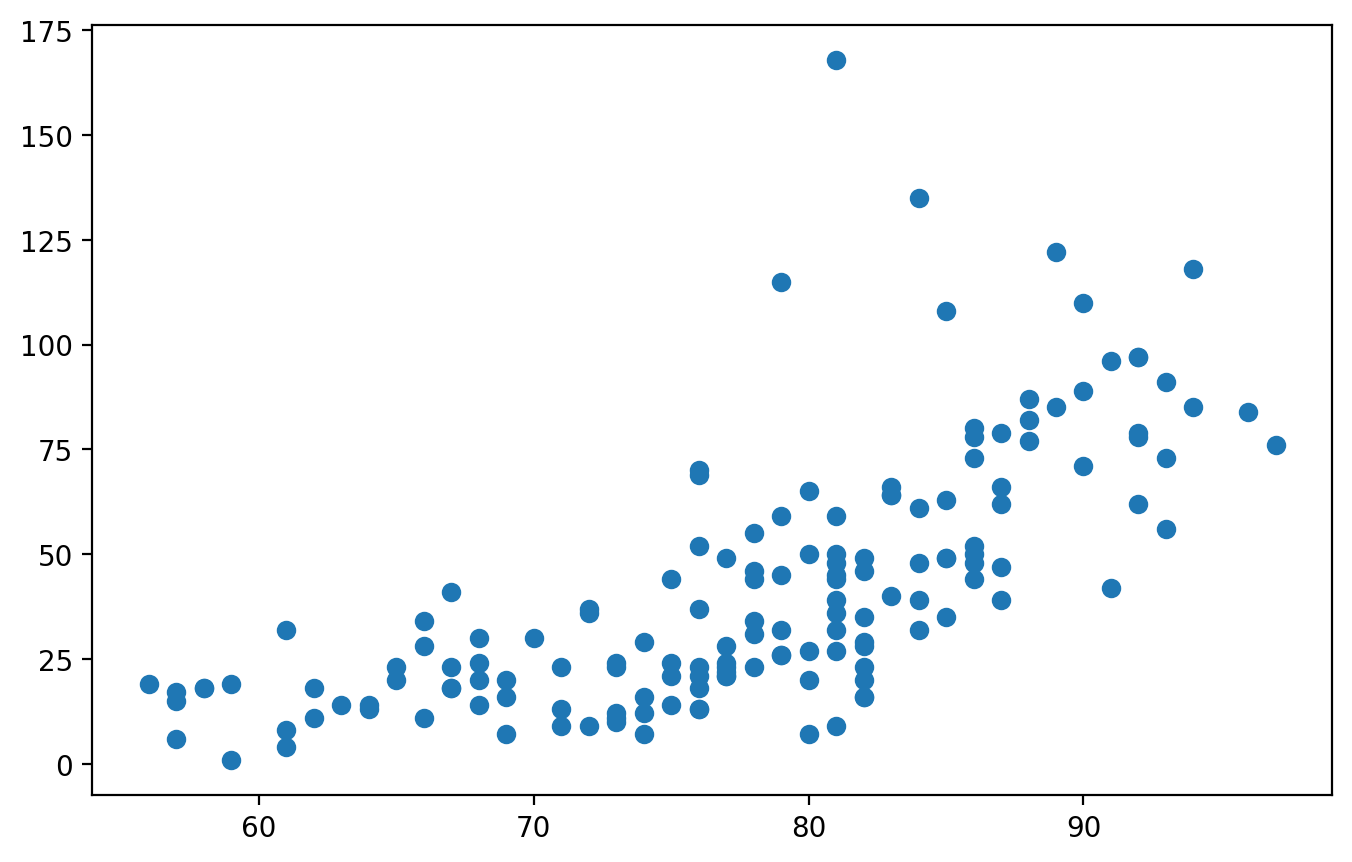

In [9]:
# Temp --> Ozone 상관관계
plt.figure(figsize=(8, 5))
plt.scatter(data['Temp'], data['Ozone'])
plt.show()

# 3.데이터 준비

- **전처리** 과정을 통해 머신러닝 알고리즘에 사용할 수 있는 형태의 데이터를 준비합니다.

<img src = "https://raw.githubusercontent.com/Jangrae/img/master/code_13.png" width=700 align="left"/>

**1) 결측치 처리**

- 결측치가 있으면 제거하거나 적절한 값으로 채웁니다.

In [10]:
# 결측치 확인
data.isnull().sum()

Ozone      0
Solar.R    7
Wind       0
Temp       0
Month      0
Day        0
dtype: int64

In [11]:
# 전날 값으로 결측치 채우기
data.ffill(inplace=True)

# 확인
data.isnull().sum()

Ozone      0
Solar.R    0
Wind       0
Temp       0
Month      0
Day        0
dtype: int64

**2) 변수 제거**

- 분석에 의미가 없다고 판단되는 변수는 제거합니다.

In [12]:
# 변수 제거
drop_cols = ['Month', 'Day']
data.drop(columns=drop_cols, inplace=True)

# 확인
data.head()

,Ozone,Solar.R,Wind,Temp
0,41,190.0,7.4,67
1,36,118.0,8.0,72
2,12,149.0,12.6,74
3,18,313.0,11.5,62
4,19,313.0,14.3,56


In [13]:
data['target'] = data['Ozone'].shift(-1)
data.head()

,Ozone,Solar.R,Wind,Temp,target
0,41,190.0,7.4,67,36.0
1,36,118.0,8.0,72,12.0
2,12,149.0,12.6,74,18.0
3,18,313.0,11.5,62,19.0
4,19,313.0,14.3,56,28.0


In [14]:
data['Ozone_p3'] = data['Ozone'].rolling(3, min_periods=1).mean()
data.head()

,Ozone,Solar.R,Wind,Temp,target,Ozone_p3
0,41,190.0,7.4,67,36.0,41.000000
1,36,118.0,8.0,72,12.0,38.500000
2,12,149.0,12.6,74,18.0,29.666667
3,18,313.0,11.5,62,19.0,22.000000
4,19,313.0,14.3,56,28.0,16.333333


In [15]:
# 전날 값으로 결측치 채우기
data.ffill(inplace=True)

# 확인
data.isnull().sum()

Ozone       0
Solar.R     0
Wind        0
Temp        0
target      0
Ozone_p3    0
dtype: int64

**3) x, y 분리**

- 우선 target 변수를 명확히 지정합니다.
- target을 제외한 나머지 변수들 데이터는 x로 선언합니다.
- target 변수 데이터는 y로 선언합니다.
- 이 결과로 만들어진 x는 데이터프레임, y는 시리즈가 됩니다.
- 이후 모든 작업은 x, y를 대상으로 진행합니다.

In [23]:
# target 확인
target = 'Ozone'   # <- 실제 target 변수 이름으로 변경해주세요
print("Target:", target)

# 데이터 분리
x = data.drop(columns=[target])
y = data[target]

# 확인
print(x.shape, y.shape)
x.head(), y.head()

Target: Ozone
(153, 5) (153,)


(   Solar.R  Wind  Temp  target   Ozone_p3
 0    190.0   7.4    67    36.0  41.000000
 1    118.0   8.0    72    12.0  38.500000
 2    149.0  12.6    74    18.0  29.666667
 3    313.0  11.5    62    19.0  22.000000
 4    313.0  14.3    56    28.0  16.333333,
 0    41
 1    36
 2    12
 3    18
 4    19
 Name: Ozone, dtype: int64)

**4) 학습용, 평가용 데이터 분리**

- 학습용, 평가용 데이터를 적절한 비율로 분리합니다.
- 반복 실행 시 동일한 결과를 얻기 위해 random_state 옵션을 지정합니다.

<img src = "https://raw.githubusercontent.com/Jangrae/img/master/split.png?" width=500 align="left"/>

In [24]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 7:3으로 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1, shuffle=False)

In [25]:
x_train.head()

,Solar.R,Wind,Temp,target,Ozone_p3
0,190.0,7.4,67,36.0,41.000000
1,118.0,8.0,72,12.0,38.500000
2,149.0,12.6,74,18.0,29.666667
3,313.0,11.5,62,19.0,22.000000
4,313.0,14.3,56,28.0,16.333333


# 4.모델링

- 본격적으로 모델을 **선언**하고 **학습**하고 **평가**하는 과정을 진행합니다.
- 우선 **회귀** 문제인지 **분류** 문제인지 명확히 구분합니다.

<img src = "https://raw.githubusercontent.com/Jangrae/img/master/code_14.png" width=700 align="left"/>

**1) 모델링**

- 회귀 문제 인가요? 분류 문제인가요?
- 회귀인지 분류인지에 따라 사용할 알고리즘과 평가 방법이 달라집니다.
- 우선 다음 알고리즘과 평가 방법을 사용합니다.
    - 알고리즘: LinearRegression
    - 평가방법: mean_absolute_error

In [26]:
# 1단계: 불러오기
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [27]:
# 2단계: 선언하기
model = LinearRegression()

In [28]:
# 3단계: 학습하기
model.fit(x_train, y_train)

LinearRegression()

In [29]:
# 4단계: 예측하기
y_pred = model.predict(x_test)
y_pred[:10]

array([37.27650416, 39.25074079, 37.82025538, 40.63094904, 33.5740343 ,
       23.86921643, 12.42529979, 24.95369802, 51.22815319, 84.75113177])

In [30]:
# 5단계: 평가하기
mean_absolute_error(y_test, y_pred)


10.530332308806726

**2) 예측값과 실젯값 비교**

- 예측값과 실젯값이 얼마나 비슷한 지를 확인합니다.

In [31]:
# 예측값, 실젯값 확인
print(y_pred[:10])
print(y_test.values[:10])

[37.27650416 39.25074079 37.82025538 40.63094904 33.5740343  23.86921643
 12.42529979 24.95369802 51.22815319 84.75113177]
[ 22  59  23  31  44  21   9  24  45 168]


- 예측값과 실젯값을 선 그래프로 시각화해 확인합니다.

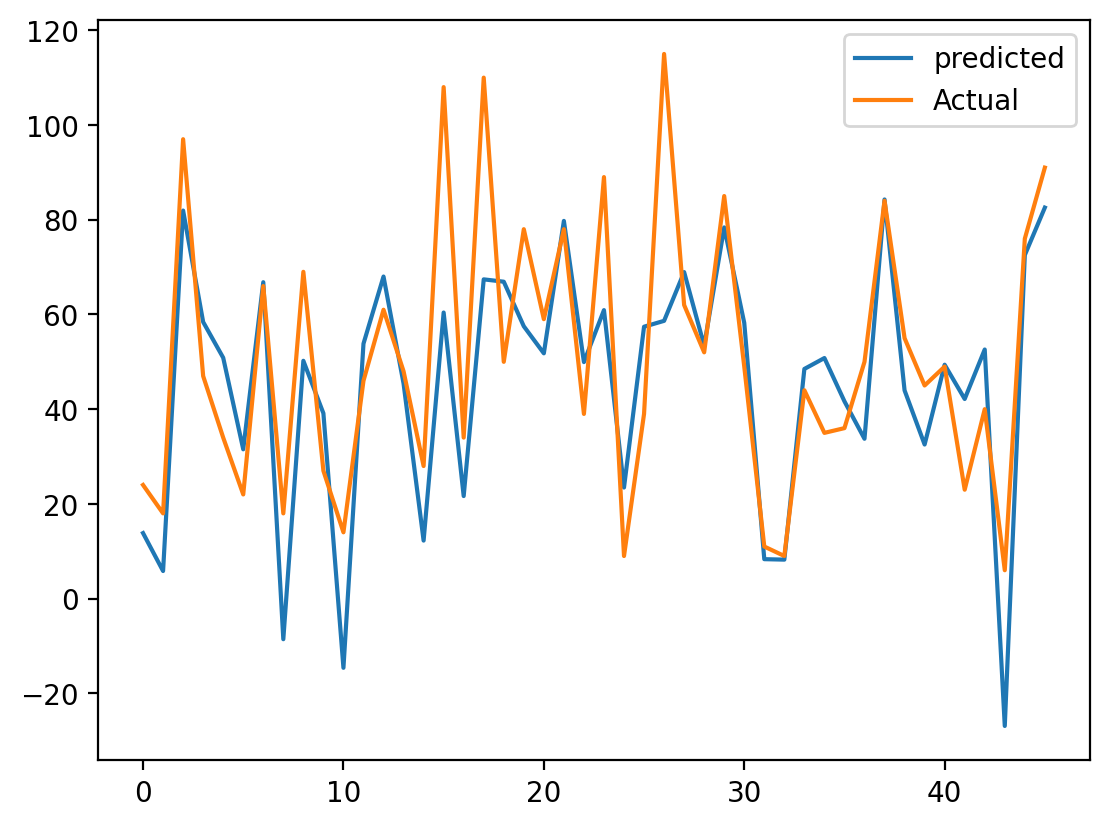

In [ ]:
# 예측값, 실젯값 시각화 비교
plt.plot(y_pred)
plt.plot(y_test.values)
plt.legend(['predicted', 'Actual'])
plt.show()